Notebook created from course: [Deep Learning with PyTorch on Coursera](https://www.coursera.org/learn/advanced-deep-learning-with-pytorch/ungradedLti/s2qby/softmax-classifier-2)

In [23]:
# !pip install torchvision torch matplotlib

In [24]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [25]:
train_dataset = dsets.MNIST(root="./data", train=True,download=True, transform=transforms.ToTensor())

In [26]:
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())


In [27]:
print("The label: ", train_dataset[3][1])

The label:  1


In [28]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

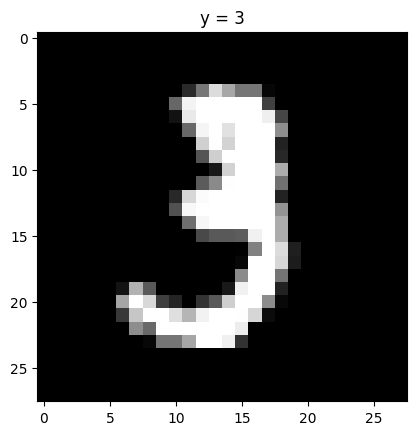

In [29]:
show_data(train_dataset[10])

In [30]:
# softmax classifier
class Softmax(nn.Module):
    def __init__(self, input_size, output_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        z = self.linear(x)
        return z

In [31]:
train_dataset[0][0].shape[1]

28

In [32]:
input_dim = train_dataset[0][0].shape[1] * train_dataset[0][0].shape[2]
output_dim = 10

In [33]:
model = Softmax(input_dim, output_dim)
print(model)

Softmax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [34]:
print('W: ',list(model.parameters())[0].size())


W:  torch.Size([10, 784])


In [35]:

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [36]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [37]:
n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

In [38]:
def train_model(n_epochs):
    for _ in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, input_dim))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        
        correct = 0
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, input_dim))
            _, pred = torch.max(z.data, 1)
            correct += (pred==y_test).sum().item()
        accuracy = correct/N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)

In [39]:
train_model(5)

In [40]:
print(loss_list)

[tensor(0.4144), tensor(0.3661), tensor(0.3463), tensor(0.3346), tensor(0.3264)]


In [41]:

print(accuracy_list)

[0.8929833333333334, 0.9034, 0.90925, 0.91235, 0.91445]
